In [1]:
dataset_name = "exchange-3_cpm_results"
path = "data/" + dataset_name + ".csv"
gaussian_window_size = 1024

In [2]:
import adclasses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Preprocess Dataset

In [3]:
data = pd.read_csv(path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]
print("Start date: ", start_date)
print("End date: ", end_date)

data["timestamp"] = pd.to_datetime(data["timestamp"], 
                                   format="%Y-%m-%d %H:%M:%S")

print("Missing time stamps: \n", adclasses.find_missing_time_steps(start_date, end_date, 
                                                                   '1H', data))

ad = adclasses.UnivariateAnomalyDetection(dataframe=data, 
                                          timestep="1H", 
                                          dateformat="%Y-%m-%d %H:%M:%S", 
                                          name=dataset_name)
print("Length: ", ad.get_length())
print("Time step size: ", ad.get_timestep())
print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Date Format: ", ad.get_dateformat())
true_outlier_dates = ["2011-08-19 18:15:01"]
true_outlier_indices = ad.convert_true_outlier_date(true_outlier_dates)
print("True outlier indices: ", true_outlier_indices)

Start date:  2011-07-01 00:15:01
End date:  2011-09-07 14:15:01
Missing time stamps: 
 DatetimeIndex(['2011-07-07 03:15:01', '2011-07-07 04:15:01',
               '2011-07-08 03:15:01', '2011-07-08 04:15:01',
               '2011-07-08 05:15:01', '2011-07-08 07:15:01',
               '2011-07-08 08:15:01', '2011-07-08 11:15:01',
               '2011-07-08 12:15:01', '2011-07-08 13:15:01',
               ...
               '2011-09-01 14:15:01', '2011-09-01 15:15:01',
               '2011-09-01 16:15:01', '2011-09-01 17:15:01',
               '2011-09-04 18:15:01', '2011-09-04 20:15:01',
               '2011-09-05 14:15:01', '2011-09-05 16:15:01',
               '2011-09-06 00:15:01', '2011-09-06 13:15:01'],
              dtype='datetime64[ns]', length=109, freq=None)
Length:  1647
Time step size:  1H
Start Date:  2011-07-01 00:15:01
End Date:  2011-09-07 14:15:01
Date Format:  %Y-%m-%d %H:%M:%S
True outlier indices:  [1194]


# GLM

In [4]:
# optimize
etas = [.5,1]
lambdas = [.99, .999, .9999]

opt_dict = {}

for eta in etas:
    for lambda_ in lambdas:
       
        mse = ad.glm(gaussian_window_size=gaussian_window_size, 
                     family='gaussian', 
                     eta=eta, 
                     lambda_=lambda_)["MSE"]

        print("eta: ", eta)
        print("lambda: ", lambda_)
        print("MSE: ",mse)

        key_str = "eta " + str(eta) + " lambda " + str(lambda_)

        opt_dict[key_str] = mse

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

100%|██████████| 1538/1538 [00:00<00:00, 12407.01it/s]

Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983



100%|██████████| 1538/1538 [00:00<00:00, 12861.14it/s]

eta:  0.5
lambda:  0.99
MSE:  0.10093694647176654
Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983



100%|██████████| 1538/1538 [00:00<00:00, 12622.37it/s]

eta:  0.5
lambda:  0.999
MSE:  0.12411621576037876
Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983



100%|██████████| 1538/1538 [00:00<00:00, 15902.63it/s]

eta:  0.5
lambda:  0.9999
MSE:  0.12835324036244075
Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983



100%|██████████| 1538/1538 [00:00<00:00, 13284.40it/s]

eta:  1
lambda:  0.99
MSE:  0.09166910174790904
Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983



100%|██████████| 1538/1538 [00:00<00:00, 13500.25it/s]

eta:  1
lambda:  0.999
MSE:  0.11627586565627293
Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983


eta:  1
lambda:  0.9999
MSE:  0.12236520968737413

best params:  eta 1 lambda 0.99


100%|██████████| 1538/1538 [00:00<00:00, 9903.91it/s]

Initial Mean 0.8363750003398948
Initial StdDev 0.41780417325558983


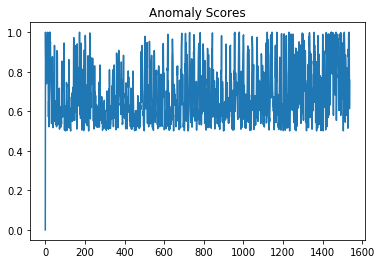

Time:  0.5034244060516357


['anomaly_scores/GLM/exchange-3_cpm_results_no_fill']

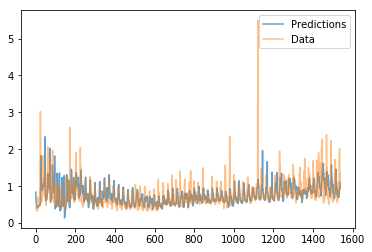

In [5]:
save_path = "anomaly_scores/GLM/" + dataset_name+ "_no_fill"
output_dict = ad.glm(gaussian_window_size=gaussian_window_size, family='gaussian', 
                     eta=1, lambda_=0.99,plot_anomaly_scores=True, plot_forecast=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# SARIMA


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -97.18894
 ARIMA(0,0,0) with non-zero mean : 103.77
 ARIMA(1,0,0) with non-zero mean : -63.80997
 ARIMA(0,0,1) with non-zero mean : -48.92186
 ARIMA(0,0,0) with zero mean     : 101.2496
 ARIMA(1,0,2) with non-zero mean : -100.166
 ARIMA(0,0,2) with non-zero mean : -74.52448
 ARIMA(1,0,1) with non-zero mean : -100.1071
 ARIMA(1,0,3) with non-zero mean : -97.77999
 ARIMA(0,0,3) with non-zero mean : -72.06526
 ARIMA(2,0,1) with non-zero mean : -97.34432
 ARIMA(2,0,3) with non-zero mean : -94.44338
 ARIMA(1,0,2) with zero mean     : -98.65348

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,0,2) with non-zero mean : 49.81533

 Best model: Regression with ARIMA(1,0,2) errors 



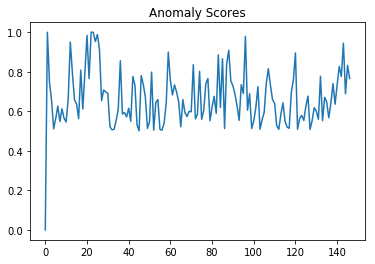

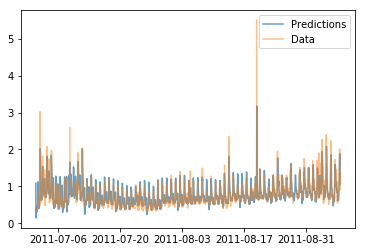

Time:  22.436926126480103


['anomaly_scores/SARIMA_auto/exchange-3_cpm_results_no_fill']

In [6]:
save_path = "anomaly_scores/SARIMA_auto/" + dataset_name+ "_no_fill"
output_dict = ad.sarimax(gaussian_window_size=gaussian_window_size, step_size=100, auto=True,
                         use_exog=True, s=24, plot_anomaly_scores=True,plot_forecast=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# Prophet

In [7]:
# optimization step

step_sizes = [100, 200]
seasonality_prior_scales = [1, 5, 10, 15, 20]
seasonality_modes = ["additive", "multiplicative"]
changepoint_prior_scales = [.01, .05, .1, .15, .2]
opt_dict = {}

for step_size in step_sizes:
    for seasonality_prior_scale in seasonality_prior_scales:
        for seasonality_mode in seasonality_modes:
            for changepoint_prior_scale in changepoint_prior_scales:
                
                mse = ad.facebook_prophet(gaussian_window_size=gaussian_window_size, 
                                          daily_seasonality=True, 
                                          seasonality_prior_scale=seasonality_prior_scale,
                                          seasonality_mode=seasonality_mode,
                                          changepoint_prior_scale=changepoint_prior_scale,
                                          step_size=step_size,
                                          optimize=True)
                print("Step Size: ", step_size)
                print("Seasonality Prior Scale: ", seasonality_prior_scale)
                print("Seasonality Mode: ", seasonality_mode)
                print("Changepoint Prior Scale: ", changepoint_prior_scale)
                print("MSE: ",mse)
                
                key_str = "Step Size " + str(step_size) + " Seasonality Prior Scale " + str(seasonality_prior_scale) +" Seasonality Mode " + str(seasonality_mode) +" Changepoint Prior Scale" + str(changepoint_prior_scale)
                
                opt_dict[key_str] = mse

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09323653566148796


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.07985243895258982


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07426410362351946


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07268997732659482


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.0708274969884373


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09427810251589315


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.07963354328773416


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07748606883104692


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07718672523374334


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07625115588855227


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09290287107102997


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.0798239184671626


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07384027560222704


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07253504195416154


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.07111018959853789


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09444253481028954


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08060473174615292


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07754877356067619


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07738438562289089


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07617546830383227


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09336753961319459


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.07877265358219121


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07359512482588966


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07254485159580654


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.07125547740892216


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09468924551055855


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08049098165738135


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07744804526067804


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.0773764754912095


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07649857032738691


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09267136443601016


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.08004175134886404


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07431044971612553


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07254953040618183


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.0715456787266438


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09450236000059112


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08114388816668619


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07752486712202768


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07750284480264608


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07623470987278855


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09365821550073243


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.07979049537011645


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07425974579537054


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07255826908368074


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.0709768229073826


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09459428321541713


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08120266167637044


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07763625711394881


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07668430934274365


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  100
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.0762812360909329


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09323653566148796


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.07985243895258982


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07426410362351946


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07268997732659482


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.0708274969884373


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09427810251589315


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.07963354328773416


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07748606883104692


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07718672523374334


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  1
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07625115588855227


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09290287107102997


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.0798239184671626


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07384027560222704


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07253504195416154


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.07111018959853789


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09444253481028954


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08060473174615292


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07754877356067619


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07738438562289089


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  5
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07617546830383227


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09336753961319459


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.07877265358219121


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07359512482588966


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07254485159580654


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.07125547740892216


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09468924551055855


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08049098165738135


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07744804526067804


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.0773764754912095


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  10
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07649857032738691


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09267136443601016


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.08004175134886404


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07431044971612553


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07254953040618183


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.0715456787266438


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09450236000059112


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08114388816668619


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07752486712202768


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07750284480264608


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  15
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.07623470987278855


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.01
MSE:  0.09365821550073243


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.05
MSE:  0.07979049537011645


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.1
MSE:  0.07425974579537054


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.15
MSE:  0.07255826908368074


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  additive
Changepoint Prior Scale:  0.2
MSE:  0.0709768229073826


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.01
MSE:  0.09459428321541713


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.05
MSE:  0.08120266167637044


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.1
MSE:  0.07763625711394881


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.15
MSE:  0.07668430934274365
Step Size:  200
Seasonality Prior Scale:  20
Seasonality Mode:  multiplicative
Changepoint Prior Scale:  0.2
MSE:  0.0762812360909329

best params:  Step Size 100 Seasonality Prior Scale 1 Seasonality Mode additive Changepoint Prior Scale0.2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


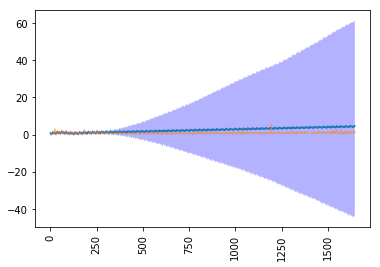

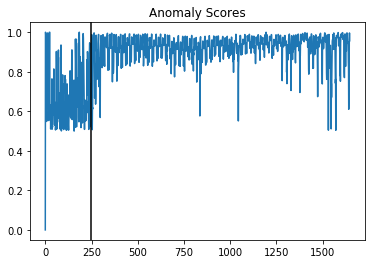

Time:  15.2428457736969


['anomaly_scores/Prophet/exchange-3_cpm_results_no_fill']

In [8]:
save_path = "anomaly_scores/Prophet/" + dataset_name+ "_no_fill"
output_dict = ad.facebook_prophet(gaussian_window_size=gaussian_window_size, 
                                  daily_seasonality=True, 
                                  seasonality_prior_scale=1,
                                  seasonality_mode="additive",
                                  changepoint_prior_scale=.2,
                                  step_size=100,
                                  plot_forecast=True,
                                  plot_anomaly_score=True)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

# STL Resid

In [9]:
# optimization step
swindows = ["periodic", 5,7,9,11]
sdegrees = [0,1,2]
twindows = [5,7,9,11]
tdegrees = [0,1,2]
inners = [1,2,3]
outers = [0,1]
opt_dict = {}

for swindow in swindows:
    for sdegree in sdegrees:
        for twindow in twindows:
            for tdegree in tdegrees:
                for inner in inners:
                    for outer in outers:
                        
                        print("swindow: ", swindow)
                        print("sdegree: ", sdegree)
                        print("twindow: ", twindow)
                        print("tdegree: ", tdegree)
                        print("inner: ", inner)
                        print("outer: ", outer)
                        
                        
                        try:
  
                            stl_resid_sum = ad.stl_resid(gaussian_window_size=gaussian_window_size, step_size=100,n_periods=24, swindow=swindow, 
                                                         sdegree=sdegree, twindow=twindow, tdegree=tdegree, inner=inner, 
                                                         outer=outer, fill_option="linear", optimize=True)


                            print("STL Resid Sum: ",stl_resid_sum)

                            key_str = "swindow " + str(swindow) + " sdegree " + str(sdegree) +" twindow " + str(twindow) +" tdegree " + str(tdegree) +" inner " + str(inner) +" outer " + str(outer)

                            opt_dict[key_str] = stl_resid_sum

                        except:
                            print("Fail")
                            continue

best_params = min(opt_dict, key=opt_dict.get)
print("\nbest params: ", best_params)

swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.9440567053887965
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.121825941130288
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.8523078433404225
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.9440567053887965
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.8109038769152397
swindow:  periodic
sdegree:  0
twindow:  5
tdegree:  0
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.8868799288855023
swindow:  p

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.302596300103417
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.381449774744228
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.269620385374189
swindow:  periodic
sdegree:  0
twindow:  9
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.3313142575354995
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  10.335870204250126
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  10.511253078869347
swindow:  periodic
sdegree:  0
twindow:  11
tdegree:  0
inner:  2
outer:  0
247
R stlplus 

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.675932080048426
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.698583294587218
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.221602465109872
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.3359397572711047
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.1550761285463387
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.221602465109872
swindow:  periodic
sdegree:  1
twindow:  7
tdegree:  2
inner:  3
outer:  0
247
R stlplus comp

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.803412175659104
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.8954639239383027
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.7756587572756515
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.803412175659104
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.7648664614631584
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.785131592036686
swindow:  periodic
sdegree:  2
twindow:  5
tdegree:  2
inner:  1
outer:  0
247
R stlplus com

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  10.290592364478227
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  10.335870204250126
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  10.289150644685167
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  0
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  10.302533675423808
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  1
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  8.945652608728007
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  1
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  9.01389973526212
swindow:  periodic
sdegree:  2
twindow:  11
tdegree:  1
inner:  2
outer:  0
247
R stlpl

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.505778440993472
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.619560746908415
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.484108091171643
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.505778440993472
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.4960924562611195
swindow:  5
sdegree:  0
twindow:  9
tdegree:  0
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.484366944439138
swindow:  5
sdegree:  0
twindow:  9
tdegree:  1
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Re

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.04429788592074402
swindow:  5
sdegree:  1
twindow:  5
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.052670758094459966
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.230223383860424
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.569010265252584
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.084832876571176
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.230223383860424
swindow:  5
sdegree:  1
twindow:  7
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
ST

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.6507497376204623
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.819327538171718
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.5811593922368865
swindow:  5
sdegree:  1
twindow:  11
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.710996050897054
swindow:  5
sdegree:  2
twindow:  5
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.60625001989955
swindow:  5
sdegree:  2
twindow:  5
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.6453212750062033
swindow:  5
sdegree:  2
twindow:  5
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
ST

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.6006048078705795
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.7248366430883455
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.5485711175204935
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.6006048078705795
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.5258209101045732
swindow:  5
sdegree:  2
twindow:  9
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.567475852136831
swindow:  5
sdegree:  2
twindow:  11
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
S

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.8314780625388165
swindow:  7
sdegree:  0
twindow:  7
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.8292436334073203
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.695157056628633
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.86815012902906
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.6386788448029983
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.695157056628633
swindow:  7
sdegree:  0
twindow:  7
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL R

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.970143897946009
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.7987353872800624
swindow:  7
sdegree:  1
twindow:  5
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.8797356233680536
swindow:  7
sdegree:  1
twindow:  5
tdegree:  2
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.07643090491595944
swindow:  7
sdegree:  1
twindow:  5
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.09186476285908132
swindow:  7
sdegree:  1
twindow:  5
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.059753086822189154
swindow:  7
sdegree:  1
twindow:  5
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. Tru

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.3985620380800565
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.96519680660447
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.056362422213265
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.9288805727181515
swindow:  7
sdegree:  1
twindow:  11
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.997149423435587
swindow:  7
sdegree:  1
twindow:  11
tdegree:  2
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.653695776745721
swindow:  7
sdegree:  1
twindow:  11
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True


R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.3814025748759873
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.0956050155358437
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.2573606968581803
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.0342092909888025
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.0956050155358437
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.008370773423602
swindow:  7
sdegree:  2
twindow:  9
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
ST

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.106316958146326
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.085785257038606
swindow:  9
sdegree:  0
twindow:  7
tdegree:  0
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.105044247039951
swindow:  9
sdegree:  0
twindow:  7
tdegree:  1
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.360336537325953
swindow:  9
sdegree:  0
twindow:  7
tdegree:  1
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.384420463448895
swindow:  9
sdegree:  0
twindow:  7
tdegree:  1
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.350761487406802
swindow:  9
sdegree:  0
twindow:  7
tdegree:  1
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Res

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.787801493336371
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.934292059376553
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.718018491321982
swindow:  9
sdegree:  1
twindow:  5
tdegree:  0
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.844061997923873
swindow:  9
sdegree:  1
twindow:  5
tdegree:  1
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.0648578196110874
swindow:  9
sdegree:  1
twindow:  5
tdegree:  1
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.465028933874206
swindow:  9
sdegree:  1
twindow:  5
tdegree:  1
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Re

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  6.351045857572088
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  6.540980550120783
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  6.281732955027443
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  6.351045857572088
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  6.254049840689849
swindow:  9
sdegree:  1
twindow:  11
tdegree:  0
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  6.307005970793147
swindow:  9
sdegree:  1
twindow:  11
tdegree:  1
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
S

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.39889091532422
swindow:  9
sdegree:  2
twindow:  7
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.4863898630078833
swindow:  9
sdegree:  2
twindow:  9
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.561792409706423
swindow:  9
sdegree:  2
twindow:  9
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.746783997757897
swindow:  9
sdegree:  2
twindow:  9
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.480042987436581
swindow:  9
sdegree:  2
twindow:  9
tdegree:  0
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.561792409706423
swindow:  9
sdegree:  2
twindow:  9
tdegree:  0
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Res

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.11294750864829724
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.131211914388701
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.09810582661476062
swindow:  11
sdegree:  0
twindow:  5
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  0.12213451538381401
swindow:  11
sdegree:  0
twindow:  7
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.484933253166789
swindow:  11
sdegree:  0
twindow:  7
tdegree:  0
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.47860479562895
swindow:  11
sdegree:  0
twindow:  7
tdegree:  0
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. T

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.028346890937183
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.008159576613255
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.03159497264857
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.028346890937183
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.021817481476767
swindow:  11
sdegree:  0
twindow:  11
tdegree:  2
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  5.033169047994224
swindow:  11
sdegree:  1
twindow:  5
tdegree:  0
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. Tr

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.87616602255463
swindow:  11
sdegree:  1
twindow:  9
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  4.929500771857422
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.981546160650856
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.3931527925936917
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.851192920840678
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.981546160650856
swindow:  11
sdegree:  1
twindow:  9
tdegree:  2
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
S

R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.261772048253493
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  2
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.418235111123013
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  3
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.2013934592944246
swindow:  11
sdegree:  2
twindow:  7
tdegree:  1
inner:  3
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  3.3166640136875114
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  1
outer:  0
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  1.6655167962913917
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  1
outer:  1
247
R stlplus completed: 247  missing. will fill. True
STL Resid Sum:  2.1051508744033205
swindow:  11
sdegree:  2
twindow:  7
tdegree:  2
inner:  2
outer:  0
247
R stlplus completed: 247  missing. will fill. Tr

In [10]:
save_path = "anomaly_scores/stl/" + dataset_name+ "_no_fill"
output_dict = ad.stl_resid(gaussian_window_size=gaussian_window_size, step_size=100,n_periods=24, swindow=5, 
             sdegree=1, twindow=5, tdegree=2, inner=3, 
             outer=0, fill_option="linear", optimize=False)
print("Time: ", output_dict["Time"])
joblib.dump(output_dict, save_path)

1647
R stlplus completed: 1647  missing. will fill. True
Time:  1.0924170017242432


['anomaly_scores/stl/exchange-3_cpm_results_no_fill']